In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
disp = pd.read_excel('DISP.xlsx', sheet_name=None, parse_dates=['Ship Date'])

In [4]:
sd = disp['Page1_43']
sd

,State,Station Name (LEA),NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type
0,SD,ABERDEEN POLICE DEPT,2355-01-602-3357,MINE RESISTANT VEHICLE,1,Each,865000.00,C,1.0,2016-12-01,State
1,SD,ALCESTER POLICE DEPT,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.00,D,1.0,2012-02-23,State
2,SD,ALCESTER POLICE DEPT,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.00,D,1.0,2012-02-23,State
3,SD,AVON POLICE DEPT,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.00,D,1.0,1998-12-28,State
4,SD,AVON POLICE DEPT,1005-00-726-5655,"PISTOL,CALIBER .45,AUTOMATIC",1,Each,58.71,D,1.0,2010-03-04,State
...,...,...,...,...,...,...,...,...,...,...,...
800,SD,YANKTON POLICE DEPT,1005-00-921-5004,"MAGAZINE,CARTRIDGE",90,Each,13.56,D,1.0,2013-03-07,State
801,SD,ZIEBACH COUNTY SHERIFF OFFICE,1005-00-726-5655,"PISTOL,CALIBER .45,AUTOMATIC",1,Each,58.71,D,1.0,2010-03-04,State
802,SD,ZIEBACH COUNTY SHERIFF OFFICE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.00,D,1.0,1998-06-25,State
803,SD,ZIEBACH COUNTY SHERIFF OFFICE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.00,D,1.0,1998-06-25,State


In [5]:
keys = disp.keys()
keys

dict_keys(['Alabama', 'Alaska', 'Arkansas', 'Arizona', 'California', 'Colorado', 'Connecticut', 'Deleware', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'Page1_43', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'CNMI', 'Guam', 'Puerto Rico', 'Virgin Islands'])

In [6]:
def totals_by_sheet(dict_of_dfs):
    dict_of_totals = {'place': [], 'total': []}
    for key in dict_of_dfs.keys():
        df = dict_of_dfs[key]
        df['Total Value'] = df['Quantity'] * df['Acquisition Value']
        dict_of_totals['place'].append(key)
        dict_of_totals['total'].append(df['Total Value'].sum())
    return pd.DataFrame(dict_of_totals)

In [7]:
totals = totals_by_sheet(disp)

In [8]:
totals['total'] = totals['total']/1000000
sorted_totals = totals.sort_values(by='total', ascending=False, ignore_index=True)

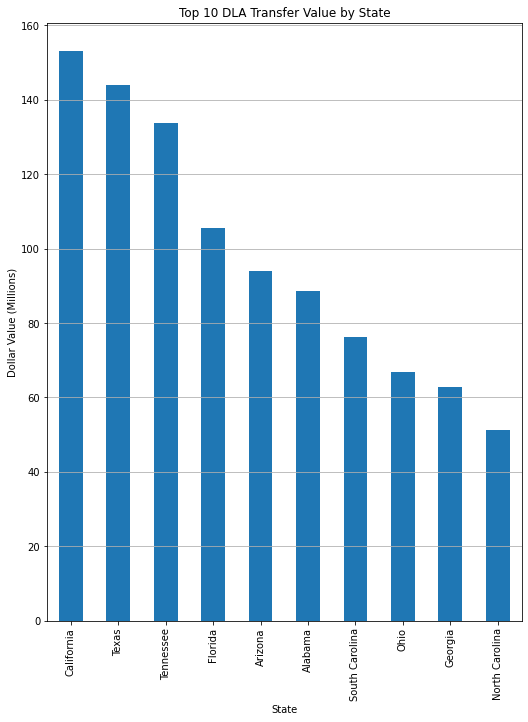

In [12]:
sorted_totals.iloc[0:10].plot(x='place', kind='bar', legend=False, figsize=(8.5, 11))
plt.title('Top 10 DLA Transfer Value by State')
plt.ylabel('Dollar Value (Millions)')
plt.xlabel('State')
plt.grid(axis='y')
plt.savefig('./testing/Top_10_fixed', pad_inches='2')